In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../input/wind-turbine-scada-dataset/T1.csv")

In [3]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
print(data.shape)
data.info()

(50530, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [5]:
data['Date/Time'] = pd.to_datetime(data['Date/Time']).dt.date

In [6]:
data = data.rename(columns = {"Date/Time":"Date",
                            "LV ActivePower (kW)":"Active_Power",
                            "Wind Speed (m/s)":"Wind_Speed",
                            "Theoretical_Power_Curve (KWh)":"Theoretical_Power",
                            "Wind Direction (°)" :"Wind_Direction"
                           })

In [7]:
data.head()

,Date,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction
0,2018-01-01,380.047791,5.311336,416.328908,259.994904
1,2018-01-01,453.769196,5.672167,519.917511,268.641113
2,2018-01-01,306.376587,5.216037,390.900016,272.564789
3,2018-01-01,419.645905,5.659674,516.127569,271.258087
4,2018-01-01,380.650696,5.577941,491.702972,265.674286


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Active_Power,50530.0,1307.684332,1312.459242,-2.471405,50.677890,825.838074,2482.507568,3618.732910
Wind_Speed,50530.0,7.557952,4.227166,0.000000,4.201395,7.104594,10.300020,25.206011
Theoretical_Power,50530.0,1492.175463,1368.018238,0.000000,161.328167,1063.776283,2964.972462,3600.000000
Wind_Direction,50530.0,123.687559,93.443736,0.000000,49.315437,73.712978,201.696720,359.997589


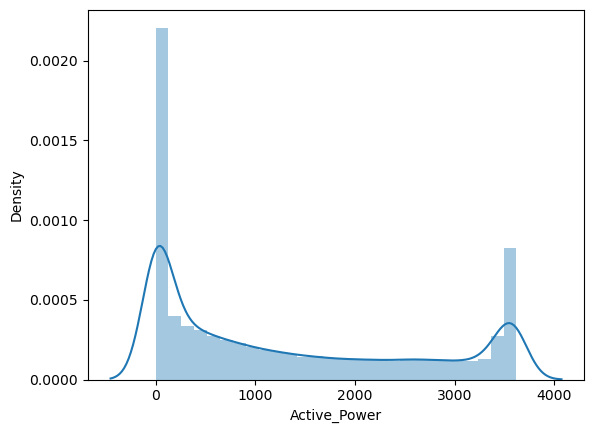

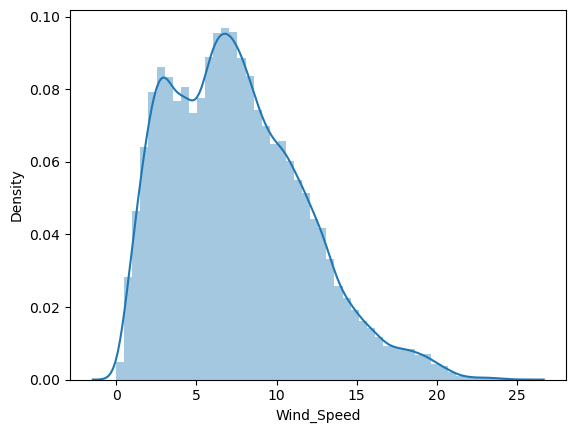

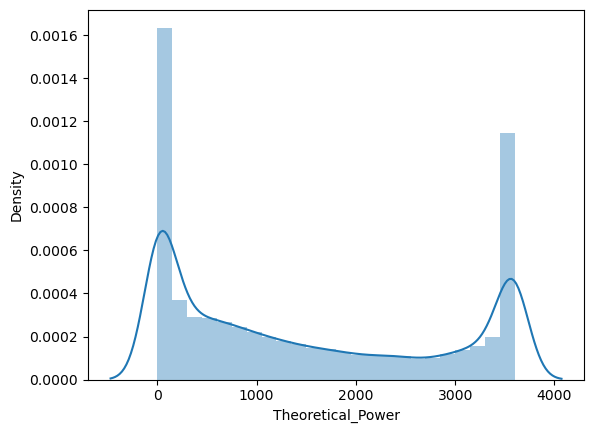

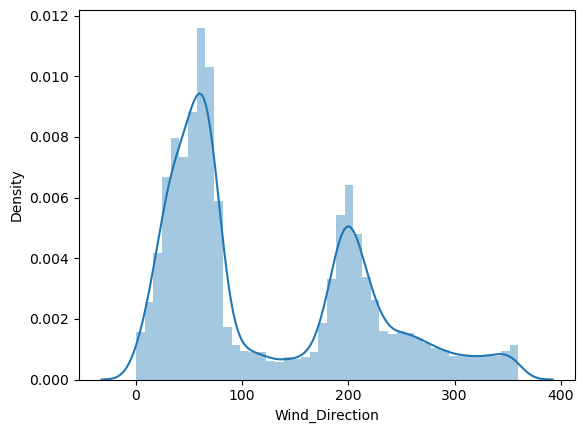

In [9]:
for feature in data.columns :
    if feature == "Date" :
        continue
    sns.distplot(data[feature])
    plt.show()

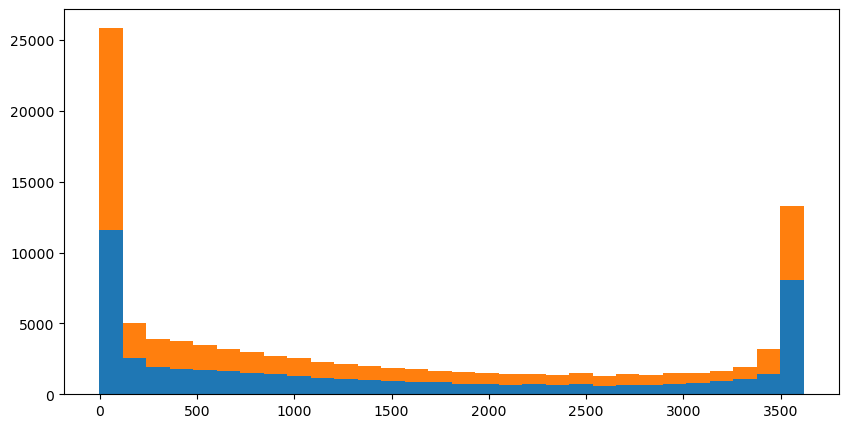

In [10]:
plt.figure(figsize = (10,5))
plt.hist([data.Theoretical_Power,\
          data.Active_Power],\
          bins=30,stacked=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

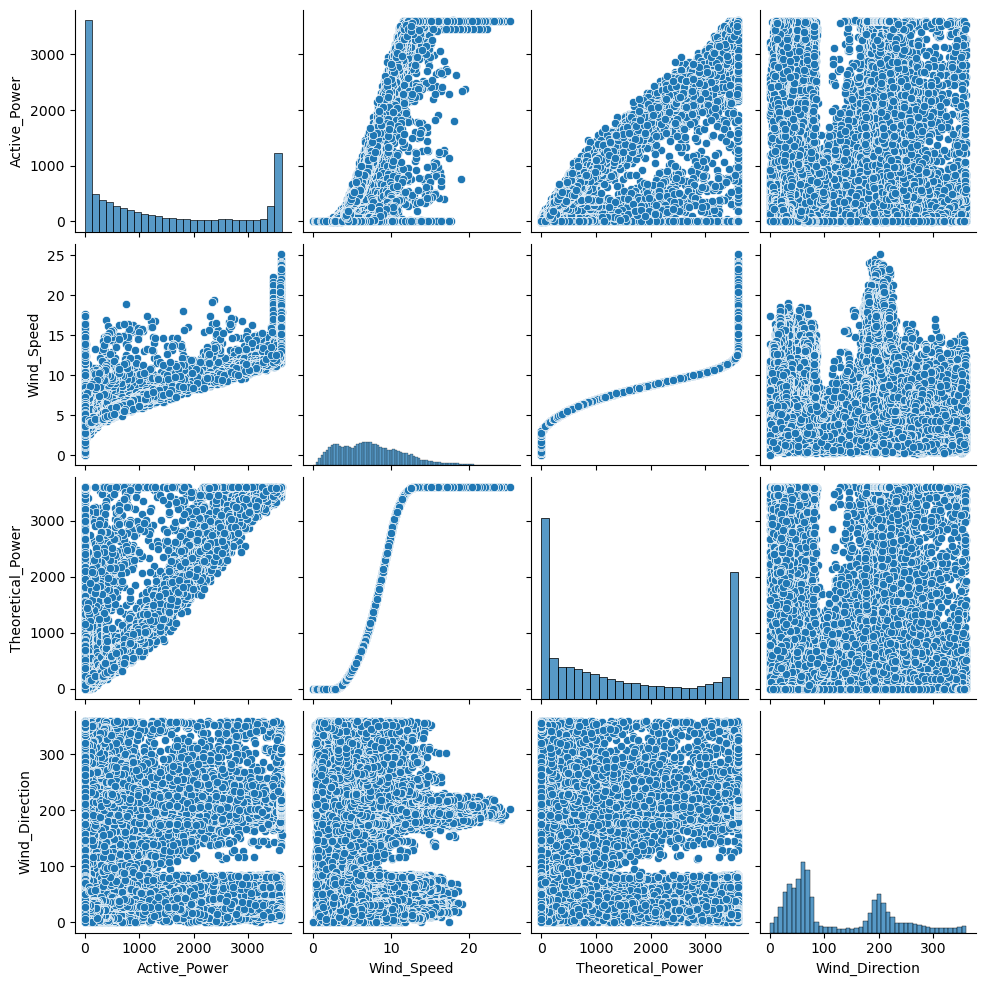

In [11]:
plt.figure(figsize = (10,10))
sns.pairplot(data)
plt.show()

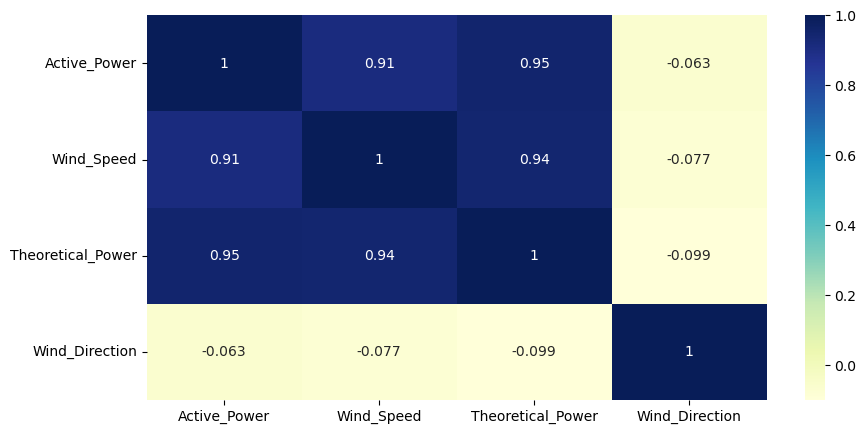

In [12]:
plt.figure(figsize = (10,5))
sns.heatmap(data.iloc[:,1:].corr(),cmap="YlGnBu",annot = True)
plt.show()

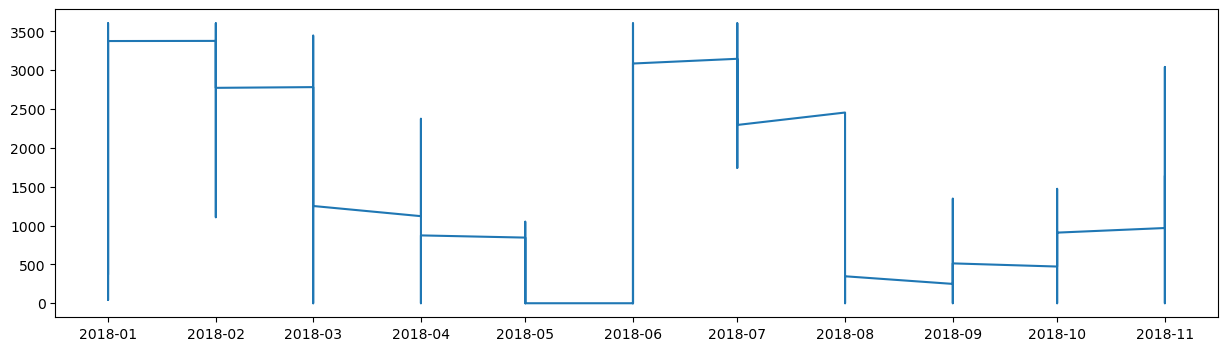

In [13]:
plt.figure(figsize = (15,4))
plt.plot(data.Date[:1500] , data.Active_Power[:1500])

In [14]:
X = data.iloc[:,2:]
y = data.iloc[:,1]

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15,random_state = 0)

In [16]:
def Model_pipeline(model) :
    Model = Pipeline(steps = [
    ('imputation', SimpleImputer(strategy='median')),
    ('Scaler',StandardScaler()),
    ('regression',model)])
    return Model

In [17]:
rf=RandomForestRegressor(n_estimators=100)
sv=SVR()
lr = LinearRegression()

In [18]:
model1 = Model_pipeline(rf)
model1.fit(X_train , y_train)
y_pred=model1.predict(X_test)
model1.score(X_test,y_test)

0.9038733770400953

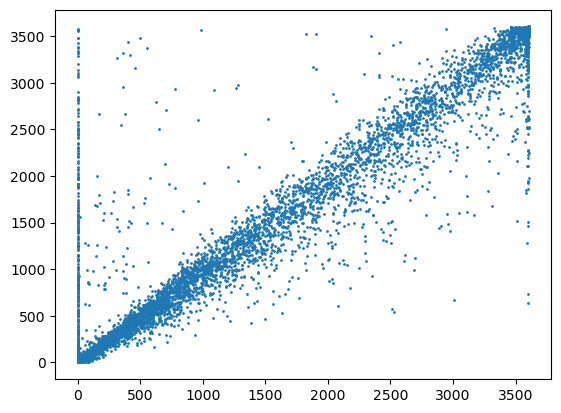

In [19]:
plt.plot(y_test, y_pred, 'o',markersize= 1 , label = 'y_test vs y_pred')

In [20]:
model2 = Model_pipeline(sv)
model2.fit(X_train , y_train)
y_pred=model2.predict(X_test)
model2.score(X_test,y_test)

0.9036073727237859

In [21]:
model3 = Model_pipeline(lr)
model3.fit(X_train , y_train)
y_pred=model3.predict(X_test)
model3.score(X_test,y_test)

0.9043819909233493